<a href="https://colab.research.google.com/github/eruru0411/git-test/blob/master/210221%E5%9B%BD%E5%8B%A2%E8%AA%BF%E6%9F%BB%E3%81%8B%E3%82%89%E3%81%AE%E5%8F%8E%E5%85%A5%E4%BA%88%E6%B8%ACipynb.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

- 0	index	int	インデックスとして使用
- 1	age	int	年齢
- 2	workclass	varchar	職業クラス
- 3	fnlwgt	int	fnlwgt
- 4	education	varchar	教育
- 5	education-num	int	教育年数
- 6	marital-status	varchar	配偶者の有無
- 7	occupation	varchar	職業
- 8	relationship	varchar	関係
- 9	race	varchar	人種
- 10	sex	varchar	性別
- 11	native-country	varchar	母国
- 12	Y	varchar	年収カテゴリ（>50K, <=50K）

国勢調査から年収の予測（$50,000を超えるか否か）

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, accuracy_score, f1_score, roc_auc_score,precision_score,recall_score, roc_curve, classification_report,precision_recall_curve
from sklearn.preprocessing import StandardScaler,RobustScaler,MinMaxScaler, Binarizer, OneHotEncoder, LabelEncoder
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV, KFold

import warnings
warnings.filterwarnings(action="ignore")

In [ ]:
train       = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/income/train.csv')
test        = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/income/test.csv')
submission  = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/income/sample_submit.csv')

In [ ]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11900 entries, 0 to 11899
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   index           11900 non-null  int64 
 1   age             11900 non-null  int64 
 2   workclass       11900 non-null  object
 3   fnlwgt          11900 non-null  int64 
 4   education       11900 non-null  object
 5   education-num   11900 non-null  int64 
 6   marital-status  11900 non-null  object
 7   occupation      11900 non-null  object
 8   relationship    11900 non-null  object
 9   race            11900 non-null  object
 10  sex             11900 non-null  object
 11  native-country  11900 non-null  object
 12  Y               11900 non-null  int64 
dtypes: int64(5), object(8)
memory usage: 1.2+ MB


In [ ]:
train.head()

,index,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,native-country,Y
0,322,21,Private,132652,Some-college,10,Divorced,Adm-clerical,Own-child,White,Female,United-States,0
1,11968,29,Private,132652,HS-grad,9,Divorced,Adm-clerical,Not-in-family,White,Female,United-States,0
2,10868,19,Private,132652,Bachelors,13,Never-married,Prof-specialty,Not-in-family,White,Female,United-States,0
3,3394,17,Private,132652,HS-grad,9,Never-married,Craft-repair,Own-child,White,Male,United-States,0
4,15993,47,Private,132652,Some-college,10,Married-civ-spouse,Craft-repair,Husband,White,Male,United-States,0


In [ ]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5100 entries, 0 to 5099
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   index           5100 non-null   int64 
 1   age             5100 non-null   int64 
 2   workclass       5100 non-null   object
 3   fnlwgt          5100 non-null   int64 
 4   education       5100 non-null   object
 5   education-num   5100 non-null   int64 
 6   marital-status  5100 non-null   object
 7   occupation      5100 non-null   object
 8   relationship    5100 non-null   object
 9   race            5100 non-null   object
 10  sex             5100 non-null   object
 11  native-country  5100 non-null   object
dtypes: int64(4), object(8)
memory usage: 478.2+ KB


In [ ]:
test.head()

,index,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,native-country
0,3873,17,Local-gov,132652,Masters,14,Married-civ-spouse,Prof-specialty,Husband,White,Male,United-States
1,3625,23,Private,132652,Some-college,10,Married-civ-spouse,Sales,Husband,White,Male,United-States
2,3028,19,Private,132652,11th,7,Never-married,Handlers-cleaners,Own-child,White,Female,United-States
3,13814,30,State-gov,132652,HS-grad,9,Never-married,Protective-serv,Unmarried,Black,Female,United-States
4,15398,60,Private,132652,Bachelors,13,Married-civ-spouse,Prof-specialty,Husband,White,Male,United-States


In [ ]:
df = train.append(test)
df.info()
#workclass, education, marital-status, occupation, relationship, race, sex, native-country->수치화
#age, education-num -> 범주화

<class 'pandas.core.frame.DataFrame'>
Int64Index: 17000 entries, 0 to 5099
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   index           17000 non-null  int64  
 1   age             17000 non-null  int64  
 2   workclass       17000 non-null  object 
 3   fnlwgt          17000 non-null  int64  
 4   education       17000 non-null  object 
 5   education-num   17000 non-null  int64  
 6   marital-status  17000 non-null  object 
 7   occupation      17000 non-null  object 
 8   relationship    17000 non-null  object 
 9   race            17000 non-null  object 
 10  sex             17000 non-null  object 
 11  native-country  17000 non-null  object 
 12  Y               11900 non-null  float64
dtypes: float64(1), int64(4), object(8)
memory usage: 1.8+ MB


In [ ]:
df.describe()

,index,age,fnlwgt,education-num,Y
count,17000.000000,17000.000000,17000.000000,17000.000000,11900.000000
mean,8499.500000,27.942529,130818.123176,10.391824,0.256134
std,4907.621624,9.504758,13811.388554,2.220970,0.436515
min,0.000000,17.000000,24694.000000,3.000000,0.000000
25%,4249.750000,21.000000,132652.000000,9.000000,0.000000
50%,8499.500000,24.000000,132652.000000,10.000000,0.000000
75%,12749.250000,34.000000,132652.000000,13.000000,1.000000
max,16999.000000,64.000000,132652.000000,16.000000,1.000000


In [ ]:
#결측치 확인
df.isnull().sum()

index                0
age                  0
workclass            0
fnlwgt               0
education            0
education-num        0
marital-status       0
occupation           0
relationship         0
race                 0
sex                  0
native-country       0
Y                 5100
dtype: int64

In [ ]:
#이상치 확인
def CHECK_OUTLIER(df=None, column=None):
    # target 값과 상관관계가 높은 열을 우선적으로 진행
    Q1 = np.percentile(df[column].values, 25)
    Q3 = np.percentile(df[column].values, 75)
    IQR = Q3 - Q1
    IQR_weight = IQR * 1.5
    minimum = Q1 - IQR_weight
    maximum = Q3 + IQR_weight
    outlier_idx = df[column][  (df[column]<minimum) | (df[column]>maximum)  ].index
    return outlier_idx

numeric_columns = df.dtypes[df.dtypes!='object'].index #object를 뺀 컬럼만 돌려야함
#columns = df.columns #[....]
for i, col in enumerate(numeric_columns) :
    outlier_idx = CHECK_OUTLIER(df=df, column=col)
    print(col, outlier_idx)

index Int64Index([], dtype='int64')
age Int64Index([  22,   71,  549,  612,  688,  759,  802,  833,  968, 1223,
            ...
            3668, 3798, 3937, 4001, 4049, 4163, 4513, 4674, 4749, 4863],
           dtype='int64', length=136)
fnlwgt Int64Index([  18,  271,  297,  369,  386,  414,  444,  447,  508,  577,
            ...
            4603, 4647, 4746, 4892, 4910, 4922, 4976, 4985, 5048, 5077],
           dtype='int64', length=295)
education-num Int64Index([], dtype='int64')
Y Int64Index([], dtype='int64')


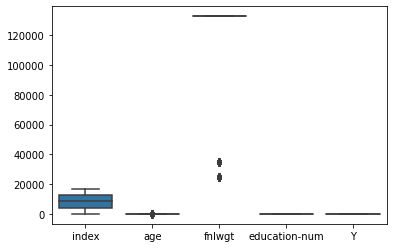

In [ ]:
sns.boxplot(data=df) #fnlwgt 삭제?

In [ ]:
# df.age.unique()
# df.age.value_counts()

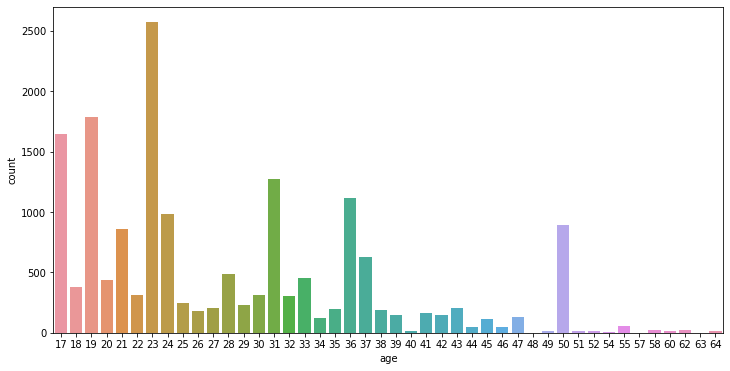

In [ ]:
plt.figure(figsize=(12,6))
sns.countplot(x='age', data=df) #구간화 하기  -> 17-19/ 20-22/ 23-25/ 26-30/ 31-35/ 36-40/ 41-49/ 50-64?

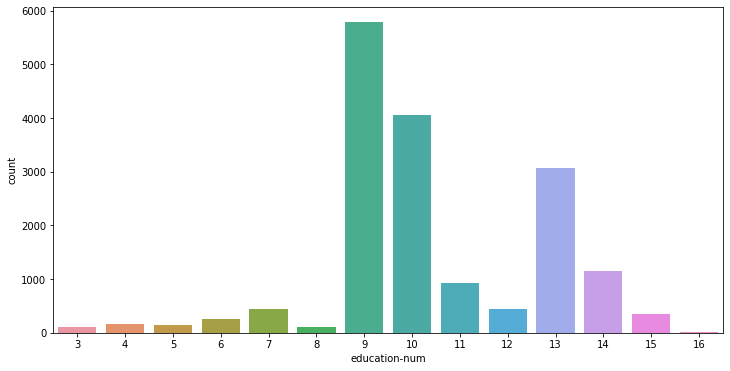

In [ ]:
plt.figure(figsize=(12,6))
sns.countplot(x='education-num', data=df)

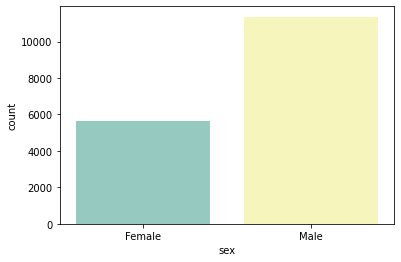

In [ ]:
sns.countplot(x='sex', data=df, palette='Set3')

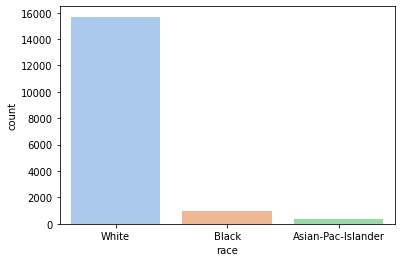

In [ ]:
sns.countplot(x='race', data=df, palette='pastel') 

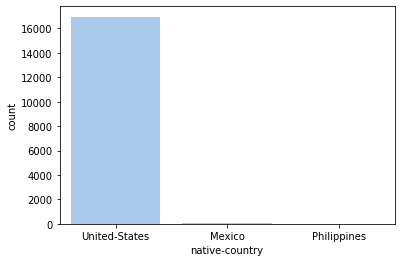

In [ ]:
sns.countplot(x='native-country', data=df, palette='pastel') 

In [ ]:
df['workclass'].value_counts() #onehot

Private             13239
Self-emp-not-inc     1183
Local-gov             837
?                     740
State-gov             426
Self-emp-inc          336
Federal-gov           239
Name: workclass, dtype: int64

In [ ]:
df['occupation'].value_counts() #직업 -> onehot

Adm-clerical         2422
Craft-repair         2332
Sales                2226
Prof-specialty       2174
Exec-managerial      2139
Other-service        1322
Machine-op-inspct     917
?                     860
Handlers-cleaners     854
Tech-support          597
Farming-fishing       458
Transport-moving      401
Protective-serv       298
Name: occupation, dtype: int64

In [ ]:
df['education'].value_counts() #교육 ->onehot

HS-grad         5681
Some-college    4024
Bachelors       3195
Masters         1147
Assoc-voc        928
Assoc-acdm       452
11th             441
Prof-school      361
10th             254
7th-8th          175
9th              161
12th             101
5th-6th           79
1st-4th            1
Name: education, dtype: int64

In [ ]:
#OneHotEncoding
df = pd.get_dummies(data=df, columns=['workclass'], prefix = 'work')
df = pd.get_dummies(data=df, columns=['occupation'], prefix = 'occu')
df = pd.get_dummies(data=df, columns=['education'], prefix = 'edu')

In [ ]:
#OneHotEncoding
df = pd.get_dummies(data=df, columns=['marital-status'], prefix = 'marry')
df = pd.get_dummies(data=df, columns=['relationship'], prefix = 'rela')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 17000 entries, 0 to 5099
Data columns (total 53 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   index                     17000 non-null  int64  
 1   age                       17000 non-null  int64  
 2   fnlwgt                    17000 non-null  int64  
 3   education-num             17000 non-null  int64  
 4   race                      17000 non-null  object 
 5   sex                       17000 non-null  object 
 6   native-country            17000 non-null  object 
 7   Y                         11900 non-null  float64
 8   work_?                    17000 non-null  uint8  
 9   work_Federal-gov          17000 non-null  uint8  
 10  work_Local-gov            17000 non-null  uint8  
 11  work_Private              17000 non-null  uint8  
 12  work_Self-emp-inc         17000 non-null  uint8  
 13  work_Self-emp-not-inc     17000 non-null  uint8  
 14  work_St

In [ ]:
# df['marital-status'].value_counts() 

In [ ]:
# df['relationship'].value_counts() #marital-status랑 병합 가능할듯?

In [ ]:
df['sex_cate'] = df['sex'].apply(lambda x: 0 if x == "Female" else 1) #여자면 0 남자면 1
df['race_cate'] = df['race'].apply(lambda x:0 if x == "White" else 1 if x == "Black" else 2) #0:백인, 1:흑인, 2:아시아계
df['native'] = df['native-country'].apply(lambda x:0 if x == "United-States" else 1 if x == "Mexico" else 2) #0:미국 1:멕시코 2:필리핀


df['age_cate'] = df['age'].apply(lambda x:0 if x <= 19 else 1 if x <= 22 else 2 if x <= 25 else 3 if x <= 30 else 4 if x <= 35 else 5 if x <= 40 else 6) #0:17-19/ 1:20-22/ 2:23-25/ 3:26-30/ 4:31-35/ 5:36-40/ 6:41-64


In [ ]:
del_col = df[['sex', 'race', 'native-country', 'age', 'fnlwgt']] #나중에 drop시킬 컬럼

In [ ]:
df = df.drop(del_col, axis=1)

In [ ]:
X = df.drop('Y', axis=1) 
y = df['Y'] #target
print(X.shape, y.shape)

(17000, 51) (17000,)


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 17000 entries, 0 to 5099
Data columns (total 52 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   index                     17000 non-null  int64  
 1   education-num             17000 non-null  int64  
 2   Y                         11900 non-null  float64
 3   work_?                    17000 non-null  uint8  
 4   work_Federal-gov          17000 non-null  uint8  
 5   work_Local-gov            17000 non-null  uint8  
 6   work_Private              17000 non-null  uint8  
 7   work_Self-emp-inc         17000 non-null  uint8  
 8   work_Self-emp-not-inc     17000 non-null  uint8  
 9   work_State-gov            17000 non-null  uint8  
 10  occu_?                    17000 non-null  uint8  
 11  occu_Adm-clerical         17000 non-null  uint8  
 12  occu_Craft-repair         17000 non-null  uint8  
 13  occu_Exec-managerial      17000 non-null  uint8  
 14  occu_Fa

In [ ]:
train_df = df.iloc[:11900,:]
test_df = df.iloc[11900:,:]

In [ ]:
train_df = df[df['index'] <= 11900].copy() #문제+답안
test_df = df[df['index'] > 11900] #답안만 가지고 있음
# /iloc으로 자르면  y_test 결측치를 람다식에서 NaN을 0으로 채워버리게 되어서 iloc으로 자르지 않고 passengerId로 자름

In [ ]:
train_df.drop("index", axis=1, inplace=True)
test_df.drop("index", axis=1, inplace=True) 

In [ ]:
train_df.isnull().sum()

education-num               0
Y                           0
work_?                      0
work_Federal-gov            0
work_Local-gov              0
work_Private                0
work_Self-emp-inc           0
work_Self-emp-not-inc       0
work_State-gov              0
occu_?                      0
occu_Adm-clerical           0
occu_Craft-repair           0
occu_Exec-managerial        0
occu_Farming-fishing        0
occu_Handlers-cleaners      0
occu_Machine-op-inspct      0
occu_Other-service          0
occu_Prof-specialty         0
occu_Protective-serv        0
occu_Sales                  0
occu_Tech-support           0
occu_Transport-moving       0
edu_10th                    0
edu_11th                    0
edu_12th                    0
edu_1st-4th                 0
edu_5th-6th                 0
edu_7th-8th                 0
edu_9th                     0
edu_Assoc-acdm              0
edu_Assoc-voc               0
edu_Bachelors               0
edu_HS-grad                 0
edu_Master

In [ ]:
X_train = train_df.drop("Y", axis=1)
y_train = train_df["Y"]
X_test = test_df.drop("Y", axis=1)

print(X_train.shape, y_train.shape, X_test.shape)
print(X_train.head())
print(X_test.head())

(11900, 50) (11900,) (5100, 50)
   education-num  work_?  work_Federal-gov  ...  race_cate  native  age_cate
0             10       0                 0  ...          0       0         1
1              9       0                 0  ...          0       0         3
2             13       0                 0  ...          0       0         0
3              9       0                 0  ...          0       0         0
4             10       0                 0  ...          0       0         6

[5 rows x 50 columns]
   education-num  work_?  work_Federal-gov  ...  race_cate  native  age_cate
0             14       0                 0  ...          0       0         0
1             10       0                 0  ...          0       0         2
2              7       0                 0  ...          0       0         0
3              9       0                 0  ...          1       0         3
4             13       0                 0  ...          0       0         6

[5 rows x 50 columns

In [ ]:
y_train.isnull().sum()

0

In [ ]:
def SPLIT_FIT_PREDICT(model, X, y, str=None, rate=0.2, prc=False, roc=False) :
    X_train ,X_test , y_train, y_test = train_test_split(X, y, test_size=rate, random_state=121)
    model.fit(X_train, y_train)
    pred = model.predict(X_test)
    proba = model.predict_proba(X_test)
    auc = roc_auc_score(y_test, proba[:, 1].reshape(-1, 1))
    SCORES(y_test, pred, proba, str)

    if prc == True: #일반적으로 그리지 말고 true면 그려라
        CHART_PRECISION_RECALL_CURV(y_test, proba)
    if roc == True:
        CHART_ROC_CURV(y_test, proba, auc)
    return X_train, X_test, y_train, y_test   # pred, proba

# rf_model = RandomForestClassifier()
# SPLIT_FIT_PREDICT(rf_model, X, y, str="최초점수", 0.5)
# SPLIT_FIT_PREDICT(rf_model, X, y)

def SCORES(y_test, pred, proba, str=None) :
    print("------{}-------".format(str))
    acc = accuracy_score(y_test, pred)
    f1 = f1_score(y_test, pred)
    precision = precision_score(y_test, pred)
    recall = recall_score(y_test, pred)
    #auc = roc_auc_score(y_test, pred)
    auc = roc_auc_score(y_test, proba[:, 1].reshape(-1, 1))
    print("정확도{:.4f}  F1 {:.4f}=(정밀도{:.4f}  재현률{:.4f} auc{:.4f}) ".format(acc, f1, precision, recall, auc))
    cf_matrix = confusion_matrix(y_test, pred)
    print(cf_matrix)

In [ ]:
from sklearn.tree import DecisionTreeClassifier #의사결정트리
from sklearn.neighbors import KNeighborsClassifier #이웃노드 분류
from sklearn.metrics import accuracy_score, f1_score, recall_score, precision_score, roc_auc_score  #정확도 평가
from sklearn.ensemble import RandomForestClassifier #랜덤포레스트

In [ ]:
dt_model = DecisionTreeClassifier()
knn_model = KNeighborsClassifier()
rf_model = RandomForestClassifier()

# models = [dt_model, knn_model, rf_model] #어떤게 잘나오는지 알아보고 싶으면 X_train을 7:3으로 해서 제일 잘나온 모델 선택해서 답안지 내도 됨. 그러나 여기서는 rf_model 쓰겠음
#fit : 학습하다
rf_model.fit(X_train, y_train)
#predict : 시험
y_pred = rf_model.predict(X_test).astype(np.int32) 
print(y_pred)

[1 0 0 ... 1 0 1]


In [ ]:
col_names = ['ID', 'Y']
submission  = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/income/sample_submit.csv', header=None, names=col_names)

In [ ]:
submission

,ID,Y
0,3873,0
1,3625,0
2,3028,0
3,13814,0
4,15398,0
...,...,...
5095,6726,0
5096,1501,0
5097,6391,0
5098,7104,0


In [ ]:
submission.iloc[:,1:]=y_pred.reshape(-1,1)
submission.to_csv("income_submission.csv", index=True)